In [85]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import urllib.request
import keras

In [86]:
# Step 1: Download the Dataset
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_file_path = 'jena_climate_2009_2016.csv.zip'
extract_folder = './extracted_data'

In [87]:
# Download the dataset if it hasn't been downloaded already
if not os.path.exists(zip_file_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, zip_file_path)
    print("Download complete!")

# Step 2: Extract the ZIP File
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Step 3: Load the Specific File from the Extracted Folder
extracted_file_path = os.path.join(extract_folder, 'jena_climate_2009_2016.csv')

# step 4: delete the zip file
os.remove(zip_file_path)

Download complete!


In [88]:
df = pd.read_csv(extracted_file_path)

In [89]:
# Convert the 'Date Time' column to datetime
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [90]:
# Display the first 5 rows
print(df.head().to_markdown(numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

|    | Date Time           | p (mbar)   | T (degC)   | Tpot (K)   | Tdew (degC)   | rh (%)   | VPmax (mbar)   | VPact (mbar)   | VPdef (mbar)   | sh (g/kg)   | H2OC (mmol/mol)   | rho (g/m**3)   | wv (m/s)   | max. wv (m/s)   | wd (deg)   |
|:---|:--------------------|:-----------|:-----------|:-----------|:--------------|:---------|:---------------|:---------------|:---------------|:------------|:------------------|:---------------|:-----------|:----------------|:-----------|
| 0  | 2009-01-01 00:10:00 | 996.52     | -8.02      | 265.4      | -8.9          | 93.3     | 3.33           | 3.11           | 0.22           | 1.94        | 3.12              | 1307.75        | 1.03       | 1.75            | 152.3      |
| 1  | 2009-01-01 00:20:00 | 996.57     | -8.41      | 265.01     | -9.28         | 93.4     | 3.23           | 3.02           | 0.21           | 1.89        | 3.03              | 1309.8         | 0.72       | 1.5             | 136.1      |
| 2  | 2009-01-01 00:30:00 | 996.53 

In [91]:
# do the simple statistical analysis and do the some feature engineering for the outliers and missing values. For instance, there is very weird value in the 'wv (m/s)' column. But not like df['wv (m/s)'].replace(9999.0, np.nan, inplace=True), use some more intelligent way to replace the outliers.
df.describe().to_markdown()

import numpy as np
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame

# Set a Z-score threshold for identifying outliers
z_score_threshold = 10

# Function to replace outliers with NaN based on Z-score
def replace_outliers_with_nan(df, threshold):
    df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
    z_scores = np.abs(stats.zscore(df_numeric, nan_policy='omit'))  # Calculate Z-scores
    
    # Replace values where the Z-score is greater than the threshold with NaN
    df_numeric[(z_scores > threshold)] = np.nan
    
    # Return the DataFrame with outliers replaced
    return df_numeric

# Apply the function to replace outliers with NaN
df_cleaned = replace_outliers_with_nan(df, z_score_threshold)

# Optionally, handle missing values in a general way (e.g., using interpolation)
df_cleaned = df_cleaned.interpolate(method='linear', limit_direction='both')

# Replace the cleaned numeric columns back into the original DataFrame
df[df_cleaned.columns] = df_cleaned


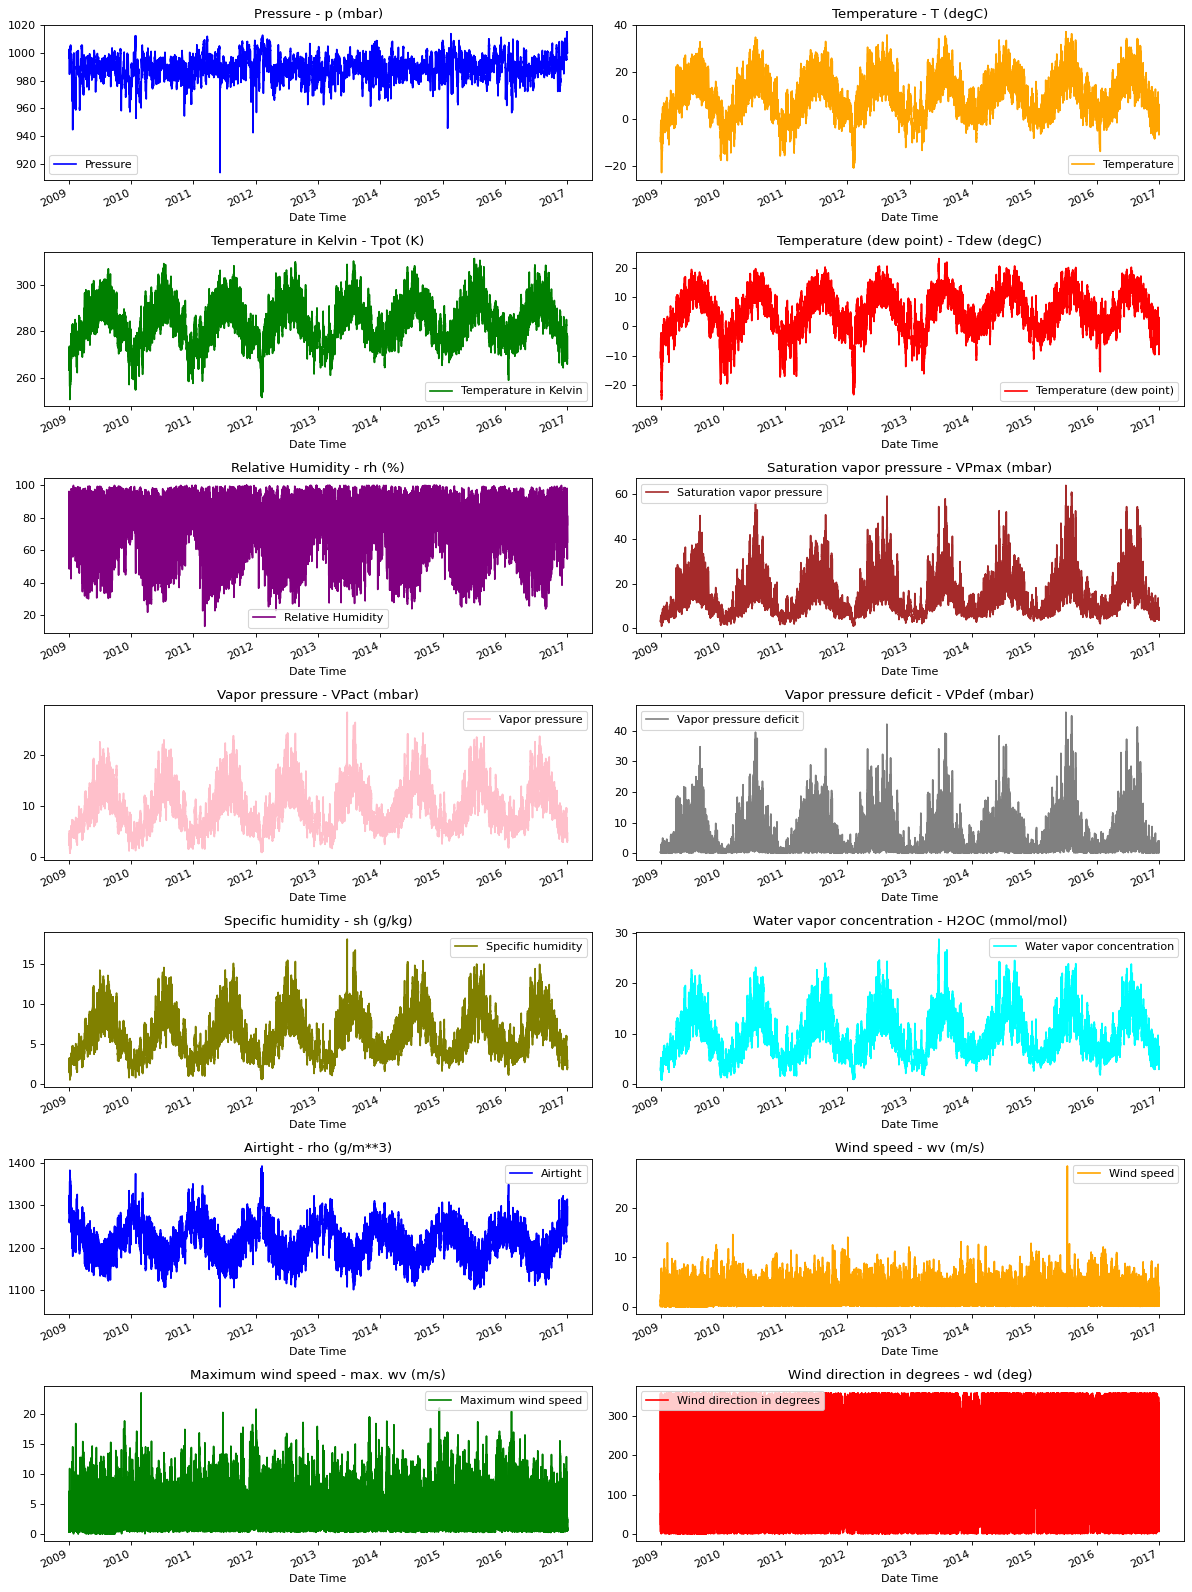

In [92]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

In [93]:
# !pip install ipywidgets

In [94]:
# from ipywidgets import interact, Output, widgets
# from plotly import graph_objs as go
# from IPython.display import display, clear_output

# # Create dropdown widget for pairs
# feature_dropdown = widgets.Dropdown(
#     options=[feature for feature in df.columns if feature != 'Date Time'],  # Exclude 'Date Time' from the dropdown
# )

# # Create the output widget for displaying the plot
# plot_output = Output()

# # Display the empty output widget once
# display(plot_output)

# def update_graph(selected_feature):
#     with plot_output:
#         # Remove the graph in the output cell already
#         clear_output(wait=True)
        
#         # Create the initial figure object outside the update function
#         fig = go.Figure()

#         # Find the corresponding color based on the selected feature
#         feature_index = feature_keys.index(selected_feature)
#         color = colors[feature_index % len(colors)]
        
#         # Update the existing figure instead of creating a new one
#         fig.data = []  # Clear the current data in the figure
#         fig.add_trace(go.Scatter(
#             x=df['Date Time'],  # Use the 'Date Time' column directly for the x-axis
#             y=df[selected_feature], 
#             name=titles[feature_index], 
#             mode='lines', 
#             marker=dict(color=color)
#         ))
        
#         # Update layout to display seasons on the x-axis
#         fig.update_layout(
#             title=f'Time Series Plot - {titles[feature_index]}',
#             xaxis_title='Date Time',
#             yaxis_title=titles[feature_index],
#         )
        
#         fig.show()


# # Attach the interact function
# interact(update_graph, selected_feature=feature_dropdown);


In [95]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
print(train_split)

300693


In [96]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [155]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)

selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
print(features.head().to_markdown(numalign="left", stralign="left"))

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
print(features.head().to_markdown(numalign="left", stralign="left"))


start = past + future # this means start of y label
end = start + train_split # this means end of y label

# train_data = features.loc[0 : train_split - 1]
x_train = features.iloc[0 : train_split][[i for i in range(7)]].values # the number of rows of train_data is train_split <- features.loc[0 : train_split - 1]
y_train = features.iloc[start:end][[1]]


val_data = features.loc[train_split:]
x_end = len(val_data) - past - future

x_val = features.iloc[train_split:(features.shape[0]-past-future)][[i for i in range(7)]].values
y_val = features.iloc[(train_split+past+future):][[1]]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed
| Date Time           | p (mbar)   | T (degC)   | VPmax (mbar)   | VPdef (mbar)   | sh (g/kg)   | rho (g/m**3)   | wv (m/s)   |
|:--------------------|:-----------|:-----------|:---------------|:---------------|:------------|:---------------|:-----------|
| 2009-01-01 00:10:00 | 996.52     | -8.02      | 3.33           | 0.22           | 1.94        | 1307.75        | 1.03       |
| 2009-01-01 00:20:00 | 996.57     | -8.41      | 3.23           | 0.21           | 1.89        | 1309.8         | 0.72       |
| 2009-01-01 00:30:00 | 996.53     | -8.51      | 3.21           | 0.2            | 1.88        | 1310.24        | 0.19       |
| 2009-01-01 00:40:00 | 996.51     | -8.31      | 3.26           | 0.19           | 1.92        | 1309.19        | 0.34       |
| 2009-01-01 00:50:00 | 996.51     | -8.27      | 3.27           | 0.19           | 1.92 

In [98]:
x_val.shape, y_val.shape

((119066, 7), (119066, 1))

In [99]:
sequence_length = int(past / step)


dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


In [104]:
len(dataset_train), len(dataset_val)

(1172, 463)

In [102]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [103]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 120, 7)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
    verbose=1,
)


Epoch 1: val_loss improved from inf to 0.15606, saving model to model_checkpoint.weights.h5

Epoch 2: val_loss improved from 0.15606 to 0.13993, saving model to model_checkpoint.weights.h5

Epoch 3: val_loss did not improve from 0.13993

Epoch 4: val_loss did not improve from 0.13993

Epoch 5: val_loss did not improve from 0.13993

Epoch 6: val_loss did not improve from 0.13993

Epoch 7: val_loss improved from 0.13993 to 0.13528, saving model to model_checkpoint.weights.h5

Epoch 8: val_loss improved from 0.13528 to 0.12994, saving model to model_checkpoint.weights.h5

Epoch 9: val_loss did not improve from 0.12994

Epoch 10: val_loss did not improve from 0.12994


In [118]:
# get the y_pred
model.load_weights(path_checkpoint)
y_pred = model.predict(dataset_val)

  6/463 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step 

463/463 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step


In [159]:
y_val = y_val[:y_pred.shape[0]]

In [162]:
y_val

,1
301485,0.225801
301486,0.314973
301487,0.291811
301488,0.311499
301489,0.327712
...,...
419832,-0.660127
419833,-0.674024
419834,-0.677498
419835,-0.677498


In [164]:
y_pred.shape

(118352, 1)

In [178]:
date_time = df[date_time_key].iloc[-y_pred.shape[0]:]

In [179]:
print(f"y_val shape: {y_val.shape}")
print(f"y_pred shape: {y_pred.shape}")
print(f"date_time shape: {date_time.shape}")

y_val shape: (118352, 1)
y_pred shape: (118352, 1)
date_time shape: (118352,)


In [181]:
df_compare = pd.DataFrame({
    "y_val": np.squeeze(y_val),  # Remove the extra dimension
    "y_pred": np.squeeze(y_pred),  # Remove the extra dimension
})


In [183]:
# merge the date_time and df_compare
df_compare[date_time_key] = date_time.values

In [186]:
df_compare.set_index(date_time_key, inplace=True)

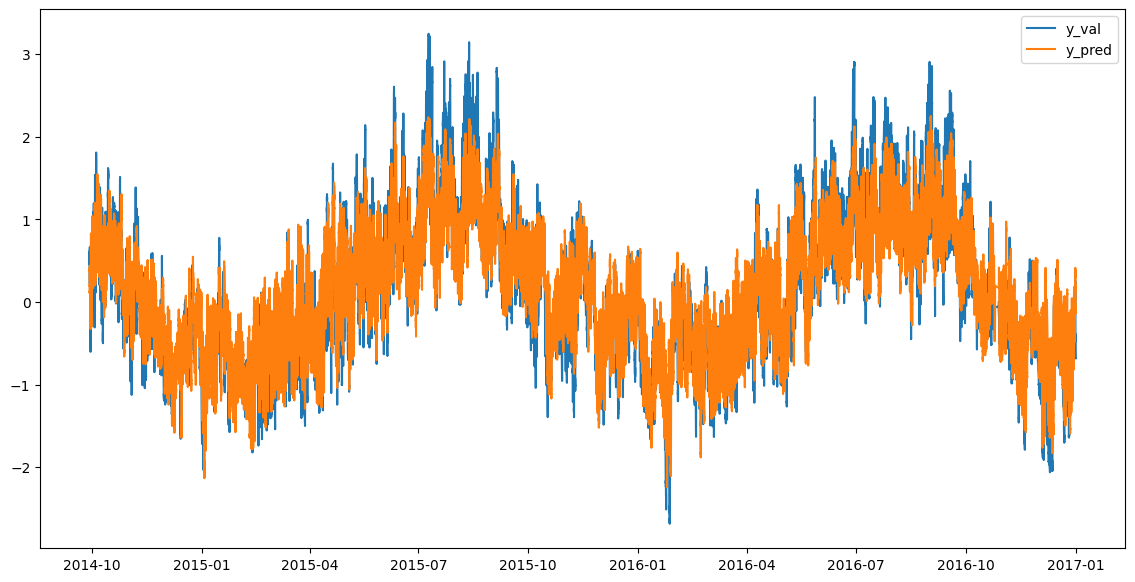

In [187]:
# create the plot for y_val and y_pred
plt.figure(figsize=(14, 7))
plt.plot(df_compare.index, df_compare['y_val'], label='y_val')
plt.plot(df_compare.index, df_compare['y_pred'], label='y_pred')
plt.legend()
plt.show()

In [188]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_compare['y_val'], df_compare['y_pred'])
print('Mean Squared Error:', mse)

Mean Squared Error: 0.12993892905262977
